In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
""" посмотрим, какие файлы храняться в директории """
import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dl-urfu-regression/sample_submission.csv
/kaggle/input/dl-urfu-regression/train.csv
/kaggle/input/dl-urfu-regression/test.csv


## Загружаем данные

In [46]:
train_df = pd.read_csv('/kaggle/input/dl-urfu-regression/train.csv')
test_df = pd.read_csv('/kaggle/input/dl-urfu-regression/test.csv')
sample_submission = pd.read_csv('/kaggle/input/dl-urfu-regression/sample_submission.csv', index_col='id')

**Описание данных**

California Housing содержит данные о средней стоимость домов в Калифорнии для квартала. Файл с данными содержит следующие столбцы:

*   **longitude** - долгота квартала с недвижимостью.
*   **latitude** - широта квартала с недвижимостью.
*   **housing_median_age** - медиана возраста домов в квартале.
*   **total_rooms** - общее колиичество комнат в квартале.
*   **total_bedrooms** - общее количество спален в квартале.
*   **population** - население квартала.
*   **households** - количество "домохозяйств" в квартале (групп людей живущих вместе в одном доме. Как правило это семьи).
*   **median_income** - медианный доход в квартале.
*   **median_house_value** - медианная стоимость дома в квартале.



In [47]:

train_df.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2409,-122.02,37.87,14.0,3056.0,369.0,1209.0,377.0,8.4352,441400.0
15628,-122.23,37.76,52.0,1705.0,246.0,658.0,253.0,5.7500,306300.0
7805,-118.26,33.89,36.0,2230.0,417.0,1395.0,381.0,2.8493,109600.0


In [48]:

test_df.sample(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
230,-117.22,33.21,19.0,4400.0,828.0,1901.0,735.0,3.6375
2572,-117.67,34.03,20.0,8561.0,1411.0,4861.0,1450.0,4.7056
556,-117.94,33.81,33.0,1891.0,334.0,932.0,343.0,4.2759


In [49]:

sample_submission.sample(3)

,median_house_value
id,
1480,0.148
457,0.457
766,0.766


## Постановка задачи регрессии

Необходимо определить медианную стоимость дома в квартале, зная все остальные признаки.

**Целевая переменная**: `median_house_value`

**Признаки**: `longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households,	median_income`

Признаки подаются на вход нейронной сети, на выходе сеть должна выдать значение целевой переменной - `median_house_value`

In [50]:

y_train = train_df.pop('median_house_value').values
x_train = train_df.values
x_test = test_df.values

In [51]:

x_train.shape, x_test.shape

((17000, 8), (3000, 8))

**Стандартизация данных**

Вычитаем среднее значение и делим на стандартное отклонение

In [52]:
# Среднее значение
mean = x_train.mean(axis=0)
# Стандартное отклонение
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

## Создаем нейронную сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации - RELU.

In [53]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [54]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               4608      
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 16)               

**Компилируем сеть**

Функция ошибки - среднеквадратичное отклонение. Метрика - среднее абсолютное отклонение.

In [55]:
model.compile(optimizer='nadam', loss='mae', metrics=['mae'])

## Обучаем нейронную сеть

In [56]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=520, 
                    batch_size=220,
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/20
70/70 - 2s - loss: 148834.4844 - mae: 148834.4844 - val_loss: 72250.3750 - val_mae: 72250.3750
Epoch 2/20
70/70 - 0s - loss: 61124.3438 - mae: 61124.3438 - val_loss: 53979.5000 - val_mae: 53979.5000
Epoch 3/20
70/70 - 0s - loss: 50950.5469 - mae: 50950.5469 - val_loss: 49035.5586 - val_mae: 49035.5586
Epoch 4/20
70/70 - 0s - loss: 47514.0898 - mae: 47514.0898 - val_loss: 47081.8945 - val_mae: 47081.8945
Epoch 5/20
70/70 - 0s - loss: 46453.7617 - mae: 46453.7617 - val_loss: 45431.6133 - val_mae: 45431.6133
Epoch 6/20
70/70 - 0s - loss: 45724.4805 - mae: 45724.4805 - val_loss: 46808.6484 - val_mae: 46808.6484
Epoch 7/20
70/70 - 0s - loss: 45217.0312 - mae: 45217.0312 - val_loss: 44594.1797 - val_mae: 44594.1797
Epoch 8/20
70/70 - 0s - loss: 44664.8125 - mae: 44664.8125 - val_loss: 43873.7891 - val_mae: 43873.7891
Epoch 9/20
70/70 - 0s - loss: 44140.8750 - mae: 44140.8750 - val_loss: 43646.8438 - val_mae: 43646.8438
Epoch 10/20
70/70 - 0s - loss: 43733.0664 - mae: 43733.0664 - 

## Визуализация качества обучения

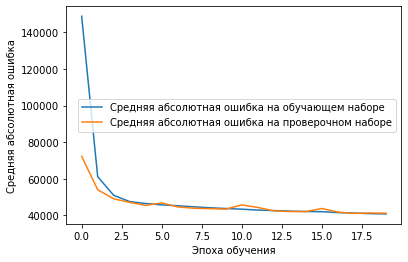

In [57]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

## Готовим данные для теста на liderboard

Делаем предсказания на тестовом наборе данных

In [58]:
"""делаем предсказания по всем тестовым данным"""
predictions = model.predict(x_test)
predictions

array([[ 23215.486],
       [ 49855.676],
       [ 22369.05 ],
       ...,
       [305241.72 ],
       [ 91033.49 ],
       [ 91613.26 ]], dtype=float32)

Пишем результаты предсказаний в шаблон "sample_submission"

In [59]:

sample_submission['median_house_value'] = predictions

Записываем ответы для проверки на liderboard

In [60]:

sample_submission.to_csv('submission.csv')